In [1]:
# Based on https://github.com/probml/pmtk3/blob/master/demos/gaussSeqUpdateSigma1D.m
# Converted by John Fearns - jdf22@infradead.org
# Sequential updating of Sigma in 1d given fixed mean


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import invgamma

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

import seaborn as sns

In [2]:
# import os
# os.environ["LATEXIFY"] = "1"
# os.environ["FIG_DIR"] = "figures"

In [3]:
latexify(width_scale_factor=1.8, fig_height=1.5)

/home/patel_karm/anaconda3/envs/py3713/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/patel_karm/anaconda3/envs/py3713/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


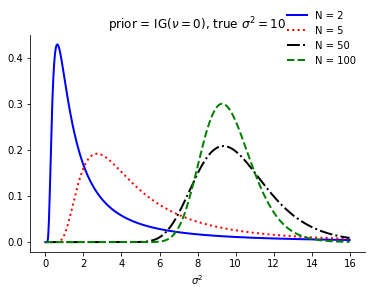

In [4]:
# Ensure stochastic reproducibility.
np.random.seed(4)

# Take 100 samples from a Gaussian with mean 5 and variance 10 as our data.
mu = 5
data = norm.rvs(size=100, loc=mu, scale=np.sqrt(10))

# Assume an uninformative prior on the variance of the Gaussian and knowledge
# that the mean is 5.
# This corresponds to a scaled inverse Chi-squared distribution on the variance
# with 0 degrees of freedom. We don't need any variables to model this.

# Define a function that returns updated scaled-inverse-chi-squared posterior parameters for
# our knowledge of the variance, given observed data and the above prior.
# Returns dof, scale.
def posterior_parameters(data):
    n = data.shape[0]
    return n, np.sum(np.square(data - mu)) / n


# A function that plots a scaled-inverse-chi-squared distribution given its parameters
def plot_posterior(dof, scaling, colour, linestyle, label):
    x = np.arange(0, 16, 0.01)
    p = scaled_inverse_chi_squared(dof, scaling).pdf(x)
    plt.plot(x, p, color=colour, linestyle=linestyle, linewidth=2, label=label)


def scaled_inverse_chi_squared(dof, scale):
    # The scaled inverse Chi-squared distribution with the provided params
    # is equal to an inverse-gamma distribution with these parameters:
    ig_shape = dof / 2
    ig_scale = dof * scale / 2
    return invgamma(ig_shape, scale=ig_scale)


# For various first-n observations, plot the posterior.
ns = [2, 5, 50, 100]
colours = ["blue", "red", "black", "green"]
linestyles = ["-", ":", "-.", "--"]
plt.figure()
for i in range(len(ns)):
    n = ns[i]
    colour = colours[i]
    linestyle = linestyles[i]
    label = "N = {}".format(n)

    plot_data = data[:n]
    dof, scaling = posterior_parameters(plot_data)
    plot_posterior(dof, scaling, colour, linestyle, label)
plt.title(r"prior = IG($\nu=0$), true $\sigma^2=10$")
plt.xlabel(r"$\sigma^2$")

plt.legend(loc="upper right", bbox_to_anchor=(1, 1.15), frameon=False)
sns.despine()
savefig("gaussSeqUpdateSigma1D.pdf")
plt.show()